### Fundamentals of Constrained Optimization
Constrained optimization has a lot more real-life utility viz. a viz. unconstrained optimization given most of the real values will have some or the other constraint associated with them. We will look a couple of examples and try to understand the physical significance of the methods being used here. 
<br>Remember we had solved the problem of unconstrained optimizations using the Hessian Matrix, here we will get something similar. However, the methodology at arriving the optimal might be a bit different. 
<br>However, what we should be aware of is that the fundamental method of finding optimum:
1. Find the critical point (where the first derivative of the function becomes Zero)
2. Find the direction in which the function is changing at the points in vicinity of the critical point
3. If the function is increasing from here (Second Derivative is > 0) means this is a minima. If the function is decreasing in the vicinity (Second Derivative is < 0) means it is a maximia. 

<br>Will always stay unchanged, given this is the fundamental intuition behind the entire process of finding the optimal solution. 

<br>One more thing that doesn't change is the *Quadratic Approximation* which again has a fundamental rationale:
1. The function in vicinity of the critical point is very very close after 3$^{rd}$ derivative and thus we can ignore higher than 2$^{nd}$ order derivative terms
2. 2$^{nd}$ order derivative forms a paraboloid which has a definitive minima/ maxima and therefore is more mathematically tractable.

<br>Let us start looking at the constraint optimization starting with an example.

---
Say our function is $2x^2 + y^2$ subject to constrain $2x + 3y + 4 = 0$. This can be represented as a graph below. 
<br>Now we don't have the absolute minima of the function available however a cut-off region for minimization let us see how we solve this problem using Lagrange multipliers. 

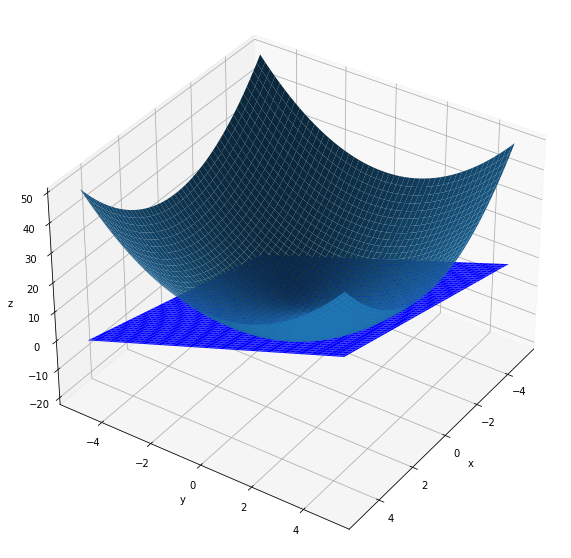

In [1]:
##THIS IS OUR CORE FUNCTION WHICH WE WILL CHANGE 
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
    return x**2 + y**2

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

def d(x,y):
    return 2*x + 3*y + 4
#THIS IS USED FOR PLOTTING THE GRAPH
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,  edgecolor='none',alpha = 1);
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
Z = d(X,Y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, edgecolor='none',color= 'blue',alpha = 1);

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(35,34)


In [2]:
# !pip install plotly sympy
# !pip install numpy
# !pip install pandas
# !pip install matplotlib

In [3]:
#PLOT 1
import sympy as sp
x,y = sp.symbols('x y')
paraboloid = sp.lambdify((x,y),2*(x**2) + y**2)
plane = sp.lambdify((x,y),2*x+3*y+4)
plane2 = sp.lambdify((x,y),x+y)
import numpy as np
points = np.arange(-5,5,0.1)
x,y = np.meshgrid(points,points)

points2 = np.arange(-2,2,0.1)
x2,y2 = np.meshgrid(points2,points2)
import plotly.graph_objects as go
fig = go.Figure(data = [go.Surface(z = paraboloid(x,y),x=x,y=y),go.Surface(z = 5+0*plane2(x2,y2),x=x2,y=y2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.show()

As we can see our plane is cutting through the paraboloid and therefore the absolute minima of the paraboloid is not available. 
<br>

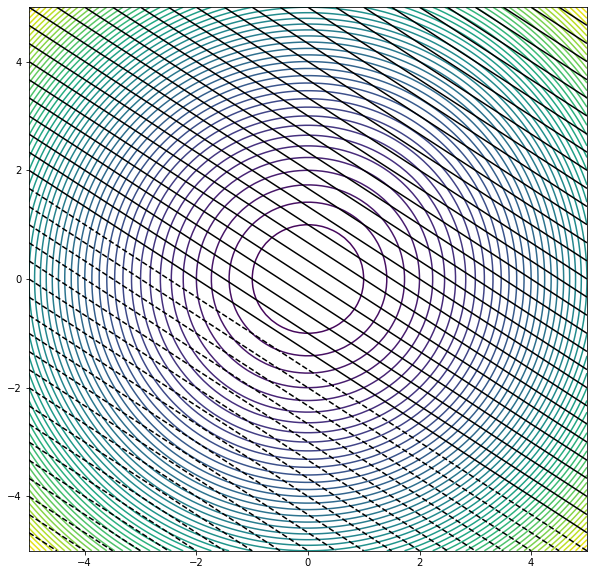

In [5]:
##THIS IS OUR CORE FUNCTION WHICH WE WILL CHANGE 
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
    return x**2 + y**2

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

def d(x,y):
    return 2*x + 3*y + 4
#THIS IS USED FOR PLOTTING THE GRAPH
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
#ax = plt.axes(projection='3d')
plt.contour(X, Y, Z,50,  alpha = 1);
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
Z = d(X,Y)
plt.contour(X, Y, Z,50, colors= 'black',alpha = 1);
#print(x)

In the contour plot above the dashed lines are below the paraboloid and the solid black lines are above, we can clearly see the intersection here as well. 

---
Now that we have the visual intuition of the problem we can move and try to arrive at an optimal solution of this problem. Let us try to understand the framework for the solution. 

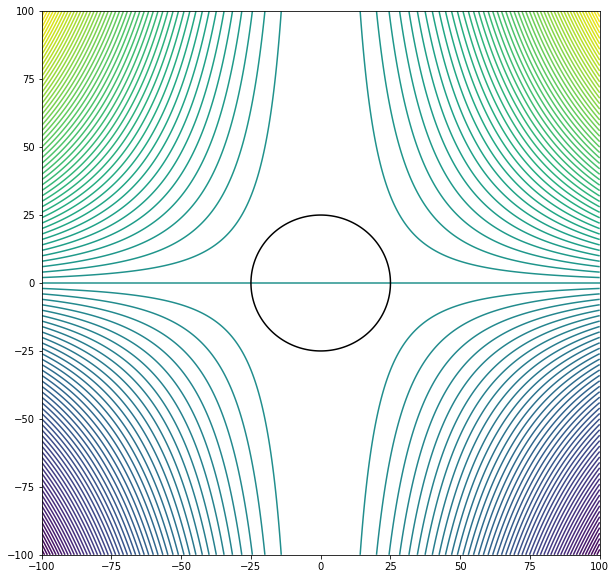

In [5]:
##THIS IS OUR CORE FUNCTION WHICH WE WILL CHANGE 
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
    return (x**2)*y

x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)

def d(x,y):
    return (x**2) + y**2
#THIS IS USED FOR PLOTTING THE GRAPH
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
#ax = plt.axes(projection='3d')
plt.contour(X, Y, Z, 100, alpha = 1);
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)
X,Y = np.meshgrid(x,y)
Z = d(X,Y)
plt.contour(X, Y, Z ,levels = np.array([625]),colors= 'black',alpha = 1);

Let us try to solve the problem of constrained optimization and understand the intuition behind the same.
<br>Say our function f(x,y) = $x^2$y is to be optimized 
<br>Given a constraint - $x^2 + y^2 = 1$

<br>Let us take a real-life example:
<br>Say we are producing a steel product which is a function of labor and steel usage. One widget yields 100 Rs as revenue. The quantity for a widget is given as $h^{\frac{2}{3}}s^{\frac{1}{3}}$. 
<br>So our function revenue becomes f(x,y) = 100$h^{\frac{2}{3}}s^{\frac{1}{3}}$
<br>Cost function for one unit of labor is 20 Rs/ hour and 2000 Rs/ hour for steel. 
<br>Our total budget is 20,000 Rs 


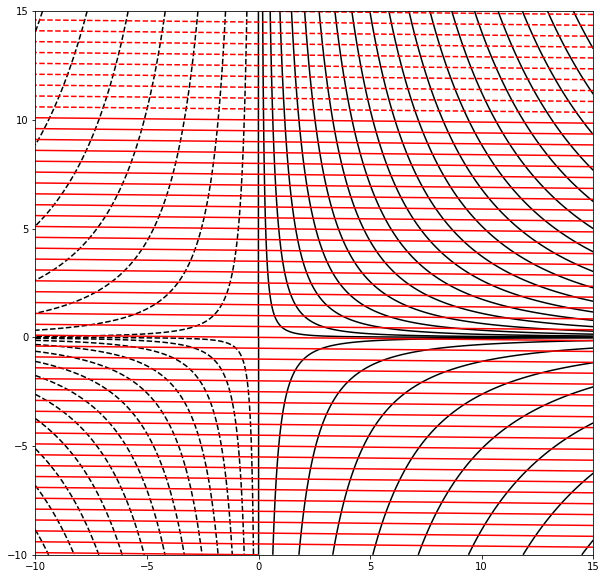

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
h = np.linspace(-10,15,1000,dtype = complex)
s = np.linspace(-10,15,1000,dtype = complex)
def f(h,s):
    return 100*(h**(2/3))*(s**(1/3))
H,S = np.meshgrid(h,s)
Z = f(H,S)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
plt.contour(H,S,np.real(Z),40,alpha=1,colors = 'black');

def d(h,s):
    return 20000-20*h - 2000*s
H,S = np.meshgrid(h,s)
Z = d(H,S)
plt.contour(H,S,np.real(Z),50,alpha=1,colors = 'red')
plt.show()

Let us visualize the same function in 3-D to understand what it exactly looks like. 
<br>Remember we don't need all this plotting to solve the optimization problem they can be pretty easily solved. We are doing this so we can understand the basic intuition behind the whole solving process. 

In [2]:
import sympy as sp
x,y = sp.symbols('x y')
paraboloid = sp.lambdify((x,y),100*(x+0j)**(2/3)*(y+0j)**(1/3))
plane = sp.lambdify((x,y),20000 - 20*x - 2000*y)
#plane2 = sp.lambdify((x,y),x+y)
import numpy as np
points = np.linspace(-10,15,100,dtype = complex)
x,y = np.meshgrid(points,points)

import plotly.graph_objects as go
fig = go.Figure(data = [go.Surface(z = np.real(paraboloid(x,y))),go.Surface(z = np.real(plane(x,y)))])
fig.show()

In order to appreciate the real shape of the plot of our function you can try-out the below code. The graph looks some what like this:
<img src="Images/Plot of Graph.png" width="600">
<br>Ok, enough of playing with the graphs now let us get to the solving of the optimization problem. 
<br>At the optimum point the contour lines of the function is going to be tangent to the contour lines of the constraint function. Remember here the constraint function is a plane and the function is a some sort of a 3-D graph. 
<br>*Why should the contour lines be tangent at the point of optimization?* 
<br>Well, the answer to this can be arrived at via thinking if they are not tangent there is still a possibility of improvement in the function value without actually breaching the constraint conditions. 
<br>While the above functions seem to be intersecting. However, remember we have only one function $x^{\frac{2}{3}}y^{\frac{1}{3}}$ and other one is a constraint 20000 = 20x + 2000y. 
<br>If we have to take a graphical approach we are allowed to move only on the graph of the function while not breaching constraints of 20x+2000y = 20000 (which is a plane in 3-D, but will become a shadow of this plane on the given function). 
<br>At the point of optimality the the constraint curve (a line projected upon the function) and the function under consideration have same slope. Which means 
<center>$\nabla f(x,y) = \lambda \nabla constraint$</center>

---
Let us try to understand what exactly this formula means. Let us recap first we have a function which is a 3-D surface and then there is an equation of a line which when projected on the surface we have to find optimum value for these two intersections. 
<br>Now if we look at the contour lines these two surfaces should be touching each other and for that to happen the gradient of both of the curves should be equal. Therefore the result
<br> <center>$\nabla f(x,y) = \nabla constraint$</center>
<br>Let me try and explain this via a picture:
<img src="Images/Optimization_Constraint.png" width="600">
<br>Here our function is the curve in purple and our constraint is a line (this line would be straight in X-Y Plane. However, becomes curved when projected on the curve.) Now our optimization problem becomes instead of finding local minima or maxima but finding maxima or minima at points where the line is being projected on the curve. 
<br>Second point to understand here is that at all points (apart from one) the gradient of the curve and the projected line is in different direction. (Look at the blue contour lines) another way to see it is the contour line will be touching the contour line (Blue Circles and Red Line) intersect each other but touch at only one point. This is the fundamental premise of the constrained optimization. Therefore we use the result:

<br> <center> $\nabla f(x,y) = \lambda \nabla constraint$</center>
<br>Why lambda, the reason to use lambda is that though the gradient of the contours are in the same direction. However, their magnitude may be different. Remember we are interested in the direction of gradient and not in the magnitude. At the below mentioned points we can see the direction of the gradients are same but their magnitude may vary we will come to the physical significance of $\lambda$ soon. 
<img src="Images/Lagrange Multiplier.png" width="600">

Now let us try to solve the problem we started off with:
<br> f(x,y) = $x^{2}y$
<br>Our constraint is $x^2 + y^2 = 1$
- Our step 1 will be write the equation $\nabla f(x,y) = \lambda \nabla(x^2 + y^2 -1)$
- $\nabla (x^2 + y^2 - 1) = \begin{bmatrix} 2x \\ 2y  \end{bmatrix}$, in the matrix form and
- $\nabla f(x,y) = \begin{bmatrix} 2xy \\ x^2\end{bmatrix}$ similarly $\nabla (x^2 + y^2 -1)= \begin{bmatrix} 2x \\ 2y \end {bmatrix}$
- Now we use the equation in step 1 to get to $\begin{bmatrix} 2xy \\ x^2\end{bmatrix} = \lambda \begin{bmatrix} 2x \\ 2y\end{bmatrix}$
- This gives us two equations 2xy = $\lambda \times$2x and $x^2$ = $\lambda \times$2y
- Now we have two equations and three variables now we will need 3 equations, well our $3^{rd}$ equation is our constraint $x^2 + y^2 = 1$. So now we have 3 equations and 3 variables (x,y, $\lambda$).
<br> Three equations are:
1. 2xy = 2$\lambda$x
2. $x^2 = 2\lambda y$
3. $x^2 + y^2 = 1$
<br>Let us solve these equations:
1. First equation gives us either x = 0 or y = $\lambda$; we will come to x = 0 later
2. Then we use value of y = $\lambda$ in $2^{nd}$ equation to give us $x^2 = 2\lambda^2$
3. Using value of $x^2$ and y in $3^{rd}$ equation $2\lambda^2 + \lambda^2 = 1$ $\to$ $\lambda = \pm\sqrt{\frac{1}{3}}$
4. Which gives us 4 sets of equation in (x,y) = ($\pm \sqrt{\frac{2}{3}}$,$\pm \sqrt{\frac{1}{3}}$). 
<br>We have found out the optimum point we are yet to find which of these points is a maxima or a minima. 
<br>Also, we are yet to get to the point of understanding $\lambda$. 
<br>Coming to the possibility where x = 0 we get solution $\lambda = 0$ and y = $\pm 1$

<img src="Images/Optimization Problem.png" width="600">

<br>As we can see from the graph the points x = 0 and y = $\pm 1$ is a critical point (might be a saddle point, we will come to this soon).

<br>If you try to compare it with the previous methods of optimization this is very similar to putting $\nabla f(x,y) = 0$ to find the point of optimization. 
<br>Only difference being instead of equating $\nabla f(x,y) \to 0$ we do $\nabla f(x,y) \to \nabla g(x)$ where g(x) is our constraint. 

---
#### Identification of Maxima and Minima
Now that we have identified which are the critical points. How do we identify which one of these points are maximas or minimas. Well one of the easiest way to evaluate the same is by putting the value of the variables obtained above into the function and check. 
<br>Let us do the same:
<br>We had following set of solutions:
- x=0 and y = $\pm 1$
- (x,y) = ($\pm \sqrt{\frac{2}{3}}, \pm \sqrt{\frac{1}{3}}$)
<br>In nutshell we have 2 + 4  = 6 solutions possible. Let us try to put the same in our function.

In [12]:
import sympy as sp
x,y = sp.symbols('x y')
func = x**2*y
func
print(func.subs([(x,0),(y,1)]))
print(func.subs([(x,0),(y,-1)]))
print(func.subs([(x,-(2/3)**0.5),(y,-(1/3)**0.5)]))
print(func.subs([(x,(2/3)**0.5),(y,-(1/3)**0.5)]))
print(func.subs([(x,(2/3)**0.5),(y,(1/3)**0.5)]))
print(func.subs([(x,-(2/3)**0.5),(y,(1/3)**0.5)]))

0
0
-0.384900179459750
-0.384900179459750
0.384900179459750
0.384900179459750


In [1]:
#!pip install sympy
import sympy as sp
x,y, lamda  = sp.symbols('x y lambda') #lambda 
x
y
func = x**2*y
func
g = x**2 + y**2 - 1 
L = func - lamda*g
L
gradL = [sp.diff(L,var) for var in [x,y]]
gradL
eqn = gradL + [g]
eqn
solution = sp.solve(eqn,[x,y,lamda],dict=True)

In [42]:
func

In [43]:
solution

In [44]:
[func.subs(p) for p in solution]

Let us try to solve this using the ```sympy``` package which will generate a little-bit neater solution and we don't have to do a lot of calculations ourselves we get the solution straight forward. 

In [15]:
import sympy as sp
x,y = sp.symbols('x y') #We define the variables for our function
sp.init_printing() #This is to enable printing in sp format (i.e. mathematical format)
func = x**2*y #We declare our objective function
g = x**2 + y**2 - 1 #We declare our constraint
lamda = sp.symbols('lambda') #We declare lambda (We have used lamda and not lambda becauce lambda is a keyword in python)
lamda 
L = func - lamda*g #We declare our lagrangian function = f(x,y) - lambda*g(x,y)
gradL = [sp.diff(L,var) for var in [x,y]] #We create 2 equations by partial differentiation
gradL 
eqn = gradL + [g] #We add the constraint equation to our variable
solution = sp.solve(eqn,[x,y,lamda],dict=True) #We determine the solution by considering x,y and lamda as variables
#Dict=True means it gives variable:Value pair in form of a dictionary
solution #This is our solution

In [16]:
[func.subs(p) for p in solution] #We substitute value of x,y in function to generate the answer

<br>We can see we get y = $\pm \sqrt{\frac{1}{3}}$ correspond to maxima and minima value of $\pm 0.3849$. Zero seems to be a stationary point and from looking at the graph looks like a saddle point. 
<br>Can there be a more formal approach to identification of the saddle points and maxima/ minima. Let us get into the same. 

**Question 2**
<br>Let us solve one more question:
<br>Optimally design a cylindrical container (with radius R and height H) to store 100$\pi$ $m^3$ of solution such that material cost for top surface is Rs 60/ $m^2$ and side surface is Rs 50 / $m^2$. 

<br>Let us formulate the problem formally:
<br>Volume of the Cylinder = $\pi \times R^2 \times H$ which is given to be = 100$\pi$ $m^3$
<br>Costs of surface = Side Surface + 2 $\times$ Bottom Surface
<br>Area of side surface = $2 \times \pi \times R \times H$
<br>Area of top surface = $2 \times \pi \times R^2$ = Area of Bottom Surface 
<br>$\to$ Cost Total Area = $50 \times 2  \pi  R H$ + $60 \times 2  \pi  R^2$
<br> If we have to write it in form of constraint and function we can write as follows:
<br> f(R,H) = $50 \times 2  \pi  R H$ + $60 \times 2  \pi  R^2$ and g(R,H) $\to \pi R^2 H = 100\pi$

By hand solution of the problem is given below: 
<img src="Images/Solution_1.jpeg" width="500">

We will try to solve the problem using ```sympy``` as well as follows:

In [1]:
import sympy as sp
sp.init_printing()
R,H = sp.symbols('R H')
lamda = sp.symbols('lambda')
func = 2*50*sp.pi*R*H + 2*60*sp.pi*R**2
func
g = sp.pi*R**2*H - 100*sp.pi
g
L  = func - lamda*g
L
gradL = [sp.diff(L,var) for var in [R,H]]
gradL
eqn = gradL + [g]
solution = sp.solve(eqn,[R,H,lamda],dict = True)
solution

In [2]:
5*3**(2/3)/3

In [18]:
[func.subs(p) for p in solution]

Except for first solution remaining solutions are imaginary. Value for minimum area is $600 \times 400^{\frac{1}{3}} \pi$

Let us solve our original problem using ```sympy```. 
<br> f(x,y) = $x^2y$
<br> g(x,y) = $x^2 + y^2 = 1$





#### Bordered Hessian Matrix
In order to determine if a particular point is a maxima or minima we can use bordered Hessian Matrix and compute the determinant of the same to identify. Bordered Hessian matrix is given by:
<br> <center>$\begin{bmatrix} 0 & g_x & g_y \\ g_x & L_{xx} & L_{xy} \\ g_y & L_{xy} & L_{yy}  \end{bmatrix}$</center>

<br> Why is it called bordered Hessian if you look at the matrix carefully the central part of the matrix which is:
<br><center> $\begin {bmatrix} L_{xx} & L_{xy} \\ L_{xy} & L_{yy}\end{bmatrix}$ </center>
<br>Is the Hessian matrix we would have used for unconstrained optimization for function L, which has been bordered by $\begin{bmatrix} 0 & g_x & g_y \end{bmatrix}$ both on rows and columns. 
<br> If we had say two constraints we would add our core matrix with following:
<br> <center>$\begin {bmatrix} 0 & h_x & h_y \\ 0 & g_x & g_y \end{bmatrix}$</center> where h(x,y) = $c_1$ and g(x,y) = $c_2$ are our two constraints. 
<br>Now if the determinant of this matrix > 0 $\to$ then it is a Maxima
<br> If the determinant of this matrix < 0 $\to$ then it is a Minima
<br> If the determinant of the matrix = 0 $\to$ we cannot conclude and the second derivative test has failed

**NOTE**: This condition is opposite to what we know Any value > 0 means minima and any value < 0 means maxima. The reason for this difference is a bit technical (when we compute condition for $f^2(x,y)$ we get a negative sign along with the bordered Hessian and therefore the conditions become opposite
<br>Let us do the same to identify points of minima and maxima for all our problems abov. 

In [45]:
Lxx = sp.diff(L,x,2)
Lyy = sp.diff(L,y,2)
Lxy = sp.diff(L,x,y)
gx = sp.diff(g,x)
gy = sp.diff(g,y)

In [46]:
Lxxval = [Lxx.subs(p) for p in solution]
Lyyval = [Lyy.subs(p) for p in solution]
Lxyval = [Lxy.subs(p) for p in solution]
gxval = [gx.subs(p) for p in solution]
gyval = [gy.subs(p) for p in solution]

In [47]:
import numpy as np
for i in range(len(gyval)):
    a = np.array([[0,float(gxval[i]),float(gyval[i])],
                  [float(gxval[i]),float(Lxxval[i]),float(Lxyval[i])],
                  [float(gyval[i]),float(Lxyval[i]),float(Lyyval[i])]])
    print(f"Bordered Hessian Matrix is \n {a}")
    print(f"Determinant of bordered Hessian is : {np.linalg.det(a)}")
    print(f"Value of function is {float(func.subs(solution[i]))}")
    print(f"Coorosponding Lambda Value {solution[i][lamda]}")
    print("-------------------------------------------------------")

Bordered Hessian Matrix is 
 [[ 0.  0. -2.]
 [ 0. -2.  0.]
 [-2.  0.  0.]]
Determinant of bordered Hessian is : 7.999999999999998
Value of function is 0.0
Coorosponding Lambda Value 0
-------------------------------------------------------
Bordered Hessian Matrix is 
 [[0. 0. 2.]
 [0. 2. 0.]
 [2. 0. 0.]]
Determinant of bordered Hessian is : -7.999999999999998
Value of function is 0.0
Coorosponding Lambda Value 0
-------------------------------------------------------
Bordered Hessian Matrix is 
 [[ 0.         -1.63299316 -1.15470054]
 [-1.63299316  0.         -1.63299316]
 [-1.15470054 -1.63299316  1.15470054]]
Determinant of bordered Hessian is : -9.23760430703401
Value of function is -0.3849001794597505
Coorosponding Lambda Value -sqrt(3)/3
-------------------------------------------------------
Bordered Hessian Matrix is 
 [[ 0.          1.63299316 -1.15470054]
 [ 1.63299316  0.          1.63299316]
 [-1.15470054  1.63299316  1.15470054]]
Determinant of bordered Hessian is : -9.2376

Now we can see for the lambda value 0 we get value of bordered Hessian as both negative and positive. However, the value of the function is the same = 0 this point should correspond to a saddle point. 
<br> For other points we where $\lambda = -\frac{\sqrt{3}}{3}$ we have a minima and for $\lambda = +\frac{\sqrt{3}}{3}$ we have a maxima.

In [16]:
# import sympy as sp
# x,y = sp.symbols('x y')
# paraboloid = sp.lambdify((x,y),100*(x+0j)**(2/3)*(y+0j)**(1/3))
# plane = sp.lambdify((x,y),20000 - 20*x - 2000*y)
# #plane2 = sp.lambdify((x,y),x+y)
# import numpy as np
# points = np.linspace(-10000,10000,100,dtype = complex)
# x,y = np.meshgrid(points,points)

# import plotly.graph_objects as go
# fig = go.Figure(data = [go.Surface(z = np.real(paraboloid(x,y)))])
# fig.show()

#x^2 + 2y^2
#1/3((x-1/2)^2 + 2(y+1/3)^4 - 1)

In [61]:
#PLOTTING GRAPH OF f(x,y) = (x^2)y
# import sympy as sp
# x,y = sp.symbols('x y')
# paraboloid = sp.lambdify((x,y),(x**2)*y)


# import numpy as np
# points = np.arange(-5,5,0.1)
# x,y = np.meshgrid(points,points)



# import plotly.graph_objects as go
# fig = go.Figure(data = [go.Surface(z = paraboloid(x,y))])
# fig.update_traces(contours_z=dict(show=True, usecolormap=True,
#                                   highlightcolor="limegreen", project_z=True))
# fig.show()

### Constrained Optimization with inequality condition (Kuhn-Tucker Solution):
Till now we have covered following conditions for optimization:
- Unconstrained where there is no constrain on the values our determining variables can take
- Equality Constraint where there is an equality constraint in the function
<br>Now we will cover inequality constraint optimization problem. Though the solution doesn't involve complexity of the Hessian matrix but it requires careful formulation (These formulation have mathematical background but are complex and we will not cover them here). 
---
The intuition behind the inequality constraint is very similar to the Lagrange multiplier approach. However, there is one catch because of inequality there may be two conditions possible 
1. The optimal point exactly follows the inequality constraint (in that case the constraint becomes binding)
2. The optimal point is not on inequality constraint (in that case this constraint has no bearing in our solution)
<br>Let us formulate the problem formally:

*OBJECTIVE FUNCTION* - f(x,y) is to be maximized or minimized
<br>*CONSTRAINTS* - $g_1(x,y) \leq c_1$ $g_2(x,y) \leq c_2$ ... $g_n(x,y) = c_n$ are the n constraints. 

<br>We formulate a Lagrangian Optimizer as:
<center><br>$\mathscr{L} = f(x,y) - \lambda_1(g_1(x,y)-c_1) - \lambda_2(g_2(x,y)-c_2) ... \lambda_n(g_n(x,y)-c_n)$</center>
<br>We compute $\large \frac {\partial{\mathscr{L}}}{\partial x}$ = 0 and $\large \frac {\partial{\mathscr{L}}}{\partial y}$ = 0. This can be extended to any number of variables x,y,z,a,b,c.
<br>Along with this we also compute:
<br> <center>$\large \frac {\partial{\mathscr{L}}}{\partial \lambda_1}$ = 0, $\large \frac {\partial{\mathscr{L}}}{\partial \lambda_2}$ = 0, $\large \frac {\partial{\mathscr{L}}}{\partial \lambda_3}$ = 0 ... $\large \frac {\partial{\mathscr{L}}}{\partial \lambda_n}$ = 0 </center>

<br>This gives us n + 2 equations and n + 2 variables (2 equations with respect to x and y then n equations with respect to $\lambda_1$, $\lambda_2$, $\lambda_3$ ... $\lambda_n$). 

<br>**NOTE** We are using x & y here we could have any number of variables our number of equations will increase proportionally. 

Brief Graphical intuition behind the same is as follows:
<img src="Images/Inequality Constraint.jpeg" width="600">

#### Formulation of Kuhn-tucker constraints in standard form:
When we formulate the Kuhn-tucker problem we have following equation for any of the inequality constraint:
<br><center>$\lambda \times g(x,y) = 0$ </center>
<br>Now, here we can have two conditions $\lambda_1 = 0$ or g(x,y) = 0
- When $\lambda_1 = 0$ means the constraint is non-binding and we don't care about the same
- When g(x,y) = 0 then this becomes an equality constraint

<br>When we formulate the constraints in standard form and write $\mathscr{L}$ in standard form we always get $\lambda \geq 0$ and this will determine which solutions to pick which not to. 
Steps involved in solving the inequality constraint problem are as follows:
1. Formulate the Kuhn-Tucker problem in standard form
2. Assume all the constraints are binding 
3. Compute values of $\lambda_1$, $\lambda_2$, $\lambda_3$ ... $\lambda_n$
4. Whichever $\lambda s$ are negative we take those constraints to be non-binding which means corresponding lambdas become Zero and those constraints are removed from our equation
5. Re-iterate with revised set of constraints and find out the solution 
6. Take solutions which have $\lambda$ values as non-negative 
7. Put the values of x and y in the original function to check for maximum and minimum

Let us try to understand this using an example: (We will also cover the standard format of formulation via this example only):
<br>**EXAMPLE 1**
<br> Maximize f(x,y) = 3x+4y
<br> Subject to constraint $g_1(x,y): x^2 + y^2 \leq 4$ and $g_2(x,y): x+1 \geq 0$


**STEP 1**: Convert into standard format: This step involves 2 things:
1. Conversion of constraint into $\leq$ format
2. Based on maximization or minimization formulation of $\mathscr{L}$ function

**CONVERSION OF CONSTRAINTS**
<br> We convert all the constraints in less-than-equal to format. Our first constraint $x^2 + y^2 \leq 4$ is already in that format. 
<br>However, our $2^{nd}$ constraint $x+1 \geq 0$ is not in the standard format for which we multiply the equation by -1 and we get $-x - 1 \leq 0$ which becomes a standard format.

**FORMULATION OF $\mathscr{L}$ FUNCTION**:
- For MAXIMA our $\mathscr{L}$ has a format $\mathscr{L}$ = f(x,y) - $\lambda_1 g_1(x,y)$ - $\lambda_2 g_2(x,y)$ ... - $\lambda_n g_n(x,y)$ 
- For MINIMA our $\mathscr{L}$ has a format $\mathscr{L}$ = f(x,y) + $\lambda_1 g_1(x,y)$ + $\lambda_2 g_2(x,y)$ ... + $\lambda_n g_n(x,y)$

<br>**NOTE THE SIGNS** FOR **MAXIMA NEGATIVE** FOR **MINIMA POSITIVE**

<br>Therefore our formulation for this function will be:
$\mathscr{L} = 3x+4y - \lambda_1(x^2 + y^2 - 4) - \lambda_2(-x-1)$

**STEP 2**: Equate partial derivative of $\mathscr{L}$ w.r.t variables = 0
<br>Means we will have $\large \frac {\partial{\mathscr{L}}}{\partial x}$ = 0 $\to$ 3 - $\lambda_1 x$ + $\lambda_2$ = 0
<br>And $\large \frac {\partial{\mathscr{L}}}{\partial y}$ = 0 $\to$ 4 - 2$\lambda_1 y$ = 0

**STEP 3**: Assume all constraints are binding $\to$ $\lambda_1 \neq 0$ and $\lambda_2 \neq 0$
<br>Which essentially means our constraints are not equality constraints i.e:
<br> $x^2 + y^2 - 4 = 0$ 
<br> $-x-1 = 0$
<br>We have 4 equations and 4 variables x,y,$\lambda_1$ and $\lambda_2$

<br> We will solve these equations using ```sympy``` package. 

In [85]:
import sympy as sp
x,y,lamda1,lamda2 = sp.symbols('x y lambda_1 lambda_2')
eqn = [3 - 2*lamda1*x + lamda2, 4 - 2*lamda1*y,-x-1,x**2 + y**2 - 4]
eqn

In [87]:
#We solve above 4 equations using sp.solve
sp.solve(eqn,[x,y,lamda1,lamda2],dict=True) #Dictionary so we get variable and value pairs

We see in the above solution $\lambda_1 = \frac{2\sqrt{3}}{3}$ in second solution which means this can be a viable solution. However, for $\lambda_2$ we have negative value in both the solutions.
<br>Which, means we go to step 4
<br>**STEP 4**: Reject constraints which give negative $\lambda$ values and treat their $\lambda$ value as Zero
<br>Here $\lambda_2$ is generating negative value so we will equate it to Zero and corresponding constraint becomes unbounded (meaning that we can ignore it). So our new equation set becomes:
<br>3 - 2$\lambda_1$x = 0
<br>4 - 2 $\lambda_1$y = 0
<br>$x^2 + y^2 = 4$
<br>Let us again solve it using ```sympy```

In [89]:
eqn = [3-2*lamda1*x, 4-2*lamda1*y,x**2 + y**2 - 4]
eqn

In [92]:
#3 Equations and 3 Variables
solution = sp.solve(eqn,[x,y,lamda1],dict=True)
solution

We are again getting two solution out of which in one solution $\lambda_1$ is Positive so we take that as the critical point therefore our point of maxima becomes ($\frac{6}{5},\frac{8}{5}$)

In [94]:
func = 3*x+4*y
func.subs(solution[1]) #We substitute 2nd set of values where lambda = 5/4 to get the value of function

---
Below are some sample codes which I had run. Will subsequently add more examples of Kuhn-Tucker and try to find out the solutions. 
<br>Hope this helps. 

**EXAMPLE 2**
<br>Objective: Minimize $x_1^2 -4x_1 + x_2^2 - 6x_2$
<br>Subjective to: $x_1 + x_2 \leq 3$ and $2x_1 - x_2 \geq -2$

<br>**STEP 1**: *Conversion to Standard Form*
<br> $x_1 + x_2 \leq 3$ and $-2x_1 + x_2 \geq 2$
<br> <center>$\mathscr{L} = x_1^2 -4x_1 + x_2^2 - 6x_2 + \lambda_1(x_1 + x_2 - 3) + \lambda_1(-2x_1 + x_2 - 2)$</center>
<br>Remember this is a minimization problem and therefore we use + to add to the f(x,y)

<br>**STEP 2**: *Partial Derivative*:
<br> <center>$\nabla (x_1^2 -4x_1 + x_2^2 - 6x_2) + \nabla (\lambda_1(x_1 + x_2 - 3)) + \nabla(\lambda_1(-2x_1 + x_2 - 2))$ = 0 </center> 
<br>Which is partial derivative w.r.t x and y

<br>This will give us two equations:
<br> $2x_1 - 4 + \lambda_1 -2\lambda_2 = 0$ 
<br> $2x_2 - 6 + \lambda_1 + \lambda_2 = 0$

<br>**STEP 3**: *Assume that all the constraints are binding $\to \lambda_1 \neq 0$ and $\lambda_2 \neq 0$*
<br>This means we get two more equations (1 for each constraint) 
<br>$x_1 + x_2 = 3$ and $-2x_1 + x_2 = 2$

<br>**STEP 4**: *Solve for the lambda values and check if any one of them is negative*
<br>We will solve these equations using ```sympy``` to understand the values of lambda

**EXAMPLE 3**
<br>Find Optimum value of radius R and height H of a cylinder which can be inscribed within sphere of radius 10 m for the maximum volume. 
<br><center><img src="Images/Example-3.png" width="400"></center>

<br>This is an example of ```Constrained Optimization with equality constraint```

Here our function is f(R,H) = $\pi R^2 H$ 
<br>Our Constraint is g(R,H) = $R^2 + (\frac{H}{2})^2 = 100$
<br>Our Lagrange Function $\mathscr{L} = f(R,H) - \lambda (g(R,H))$
<br>Which means: $\mathscr(L)$  = $\pi R^2 H - R^2 + \lambda ((\frac{H}{2})^2 - 100)$
<br>We can solve this using the ```sympy``` package again

In [12]:
import sympy as sp
R,H, lamda = sp.symbols('R H lambda')
sp.init_printing()
func = sp.pi*R**2*H
g = R**2 + (H/2)**2 - 100
func
L = func - lamda*g
gradL = [sp.diff(L,var) for var in [R,H]]
gradL
eqn = gradL + [g]

In [15]:
solution = sp.solve(eqn,[R,H,lamda],dict = True)
solution

In [18]:
[func.subs(p) for p in solution]

In [20]:
[round(float(func.subs(p)),2) for p in solution]

In [1]:
import numpy as np
10*np.sqrt(6)/3

8.16496580927726

If you look carefully we have 6 possible values as optimal point which is because the curve is very similar to $x^2y$.
<br>We get Two Saddle Points and Two points of minima and maxima each. 
<br>However, if you look at the physical significance neither of R and Height can be negative therefore the maximum volume correspond to <br> $H = \frac{20\sqrt{3}}{3}$ and $R = \frac{10\sqrt{6}}{3}$
<br>With the $volume = \frac{4000\sqrt{3}\pi}{9}$
<br>Which is equal to 2,418.4 $m^3$

In [5]:
import sympy as sp
sp.init_printing()
x1,x2,lamda1, lamda2 = sp.symbols('x_1 x_2 lambda_1 lambda_2')

eqn = [2*x1 - 4 + lamda1 - 2*lamda2, 2*x2-6+lamda1 + lamda2, x1 + x2 -3,-2*x1 + x2 -2]
eqn
sp.solve(eqn,[x1,x2,lamda1,lamda2],dict=True)

We get $\lambda_2 \lt 0$ means the second constraint is non-bounding and we can assume $\lambda_2 = 0$ and remove second constraint.
<br>Our revised set of equations become:
<br>$2x_1 - 4 + \lambda_1 = 0$
<br>$2x_2 - 6 + \lambda_1 = 0$
<br>$x_1 + x_2 = 3$
<br>Again using ```sympy```

In [8]:
eqn = [2*x1 - 4 + lamda1,2*x2-6+lamda1,x1+x2-3]
eqn
sp.solve(eqn,[x1,x2,lamda1],dict=True)

We have a plausible candidate where $\lambda_1 = 2$ and ($x_1,x_2$) = (1,2)

In [10]:
func = x1**2 - 4*x1 + x2**2 - 6*x2
func.subs(sp.solve(eqn,[x1,x2,lamda1]))

Giving the minimum value of the function as -11

### SAMPLE CODES CAN BE IGNORED

In [62]:
import numpy as np
a = np.array([[2,0,1,-2],[0,2,1,1],[1,1,0,0],[-2,1,0,0]])
b = np.array([[4,6,3,2]]).T
np.dot(np.linalg.inv(a),b)

array([[ 0.33333333],
       [ 2.66666667],
       [ 1.55555556],
       [-0.88888889]])

In [63]:
import sympy as sp
x,y,a,b = sp.symbols('x y a b')
eqn = [2*x+a-2*b-4,2*y-6+a+b,x+y-3,-2*x+y-2]

In [64]:
eqn

In [75]:
sp.solve(eqn,[x,y,a,b],dict=True)

In [76]:
eqn = [2*x + a -4,2*y -6 + a,x+y-3]
sp.solve(eqn,[x,y,a],dict=True)

In [77]:
eqn = [3 - 2*a*x + b,4-2*a*y,-x-1,x**2 + y**2 -4]

In [78]:
eqn

In [79]:
sp.solve(eqn,[x,y,a,b],dict = True)

In [80]:
-3 + 4*np.sqrt(3)/3

In [81]:
eqn = [3-2*a*x,4-2*a*y,x**2 + y**2 -4]
sp.solve(eqn,[x,y,a],dict = True)